<a href="https://colab.research.google.com/github/ahussain1724/Project1/blob/main/Local_Beam_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beam Width: 2
No solution found within maximum iterations.
Solution found: [2, 5, 3, 1, 7, 4, 6, 0]
No solution found within maximum iterations.
No solution found within maximum iterations.
No solution found within maximum iterations.
Solution found: [3, 7, 0, 4, 6, 1, 5, 2]
Solution found: [3, 1, 7, 5, 0, 2, 4, 6]
No solution found within maximum iterations.
Solution found: [0, 6, 3, 5, 7, 1, 4, 2]
Solution found: [3, 5, 7, 1, 6, 0, 2, 4]
Success rate: 0.5


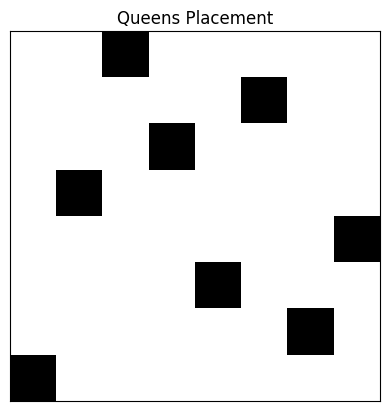

Beam Width: 4
No solution found within maximum iterations.
Solution found: [4, 0, 7, 5, 2, 6, 1, 3]
Solution found: [2, 5, 1, 6, 4, 0, 7, 3]
Solution found: [4, 2, 0, 6, 1, 7, 5, 3]
Solution found: [5, 2, 6, 1, 7, 4, 0, 3]
Solution found: [5, 2, 0, 6, 4, 7, 1, 3]
Solution found: [2, 4, 6, 0, 3, 1, 7, 5]
No solution found within maximum iterations.
Solution found: [6, 2, 7, 1, 4, 0, 5, 3]
Solution found: [1, 6, 4, 7, 0, 3, 5, 2]
Success rate: 0.8


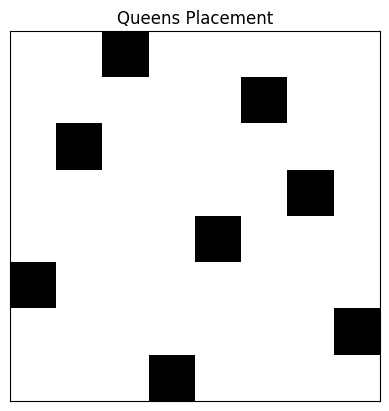

Beam Width: 6
Solution found: [5, 1, 6, 0, 2, 4, 7, 3]
Solution found: [3, 1, 6, 2, 5, 7, 0, 4]
Solution found: [6, 3, 1, 7, 5, 0, 2, 4]
Solution found: [3, 6, 0, 7, 4, 1, 5, 2]
Solution found: [0, 5, 7, 2, 6, 3, 1, 4]
Solution found: [1, 7, 5, 0, 2, 4, 6, 3]
Solution found: [6, 3, 1, 4, 7, 0, 2, 5]
Solution found: [2, 7, 3, 6, 0, 5, 1, 4]
Solution found: [1, 5, 0, 6, 3, 7, 2, 4]
Solution found: [5, 3, 1, 7, 4, 6, 0, 2]
Success rate: 1.0


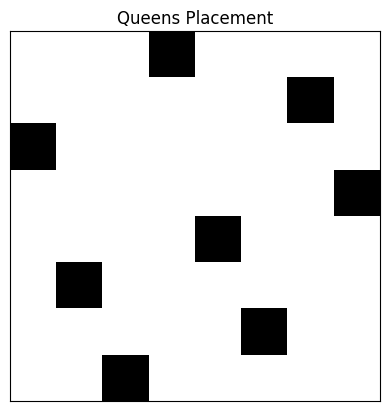

Beam Width: 8
Solution found: [3, 7, 0, 2, 5, 1, 6, 4]
Solution found: [5, 3, 0, 4, 7, 1, 6, 2]
Solution found: [3, 0, 4, 7, 1, 6, 2, 5]
No solution found within maximum iterations.
No solution found within maximum iterations.
Solution found: [3, 1, 7, 5, 0, 2, 4, 6]
No solution found within maximum iterations.
Solution found: [6, 0, 2, 7, 5, 3, 1, 4]
No solution found within maximum iterations.
Solution found: [4, 1, 5, 0, 6, 3, 7, 2]
Success rate: 0.6


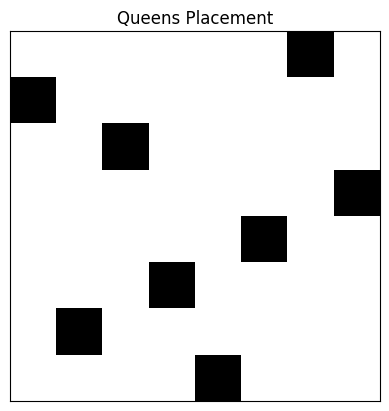

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate conflicts for a given state
def calculate_conflicts(state):
    conflicts = 0
    n = len(state)
    for i in range(n):
        for j in range(i + 1, n):
            if state[i] == state[j] or abs(state[i] - state[j]) == j - i:
                conflicts += 1
    return conflicts

# Function to generate successor states by making one move
def generate_successors(state):
    successors = []
    n = len(state)
    for i in range(n):
        for j in range(n):
            if j != state[i]:
                successor = list(state)
                successor[i] = j
                successors.append(successor)
    return successors

# Function to perform local beam search
def local_beam_search(n, k, max_iterations=1000):
    states = [random.sample(range(n), n) for _ in range(k)]
    iterations = 0
    while iterations < max_iterations:
        successors = []
        for state in states:
            if calculate_conflicts(state) == 0:
                return state
            successors.extend(generate_successors(state))
        states = sorted(successors, key=calculate_conflicts)[:k]
        iterations += 1
    return None

# Function to visualize the chessboard with queens
def visualize_queens(state):
    n = len(state)
    board = np.zeros((n, n))
    for i in range(n):
        board[i][state[i]] = 1
    plt.imshow(board, cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.title('Queens Placement')
    plt.show()

# Main function to run the experiment with different beam widths
def main():
    n = 8  # Chessboard size
    beam_widths = [2, 4, 6, 8]  # Different beam widths to try
    for k in beam_widths:
        print(f"Beam Width: {k}")
        solutions = []
        for _ in range(10):  # Run the algorithm multiple times to observe variations
            solution = local_beam_search(n, k)
            if solution:
                solutions.append(solution)
                print("Solution found:", solution)
            else:
                print("No solution found within maximum iterations.")
        print("Success rate:", len(solutions) / 10)
        if solutions:
            visualize_queens(random.choice(solutions))

if __name__ == "__main__":
    main()
